In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
import sys

import os, sys
os.chdir('/home/phyto-2/CASCADE/')  # Provide your path here

sys.path.insert(0, './cascade/')

from plots import LM_SEM_size, sd_simulations,  LM_SEM_size_plot, depth_time_samples_plot, plot_samples_latlon
from main import regression_simulation

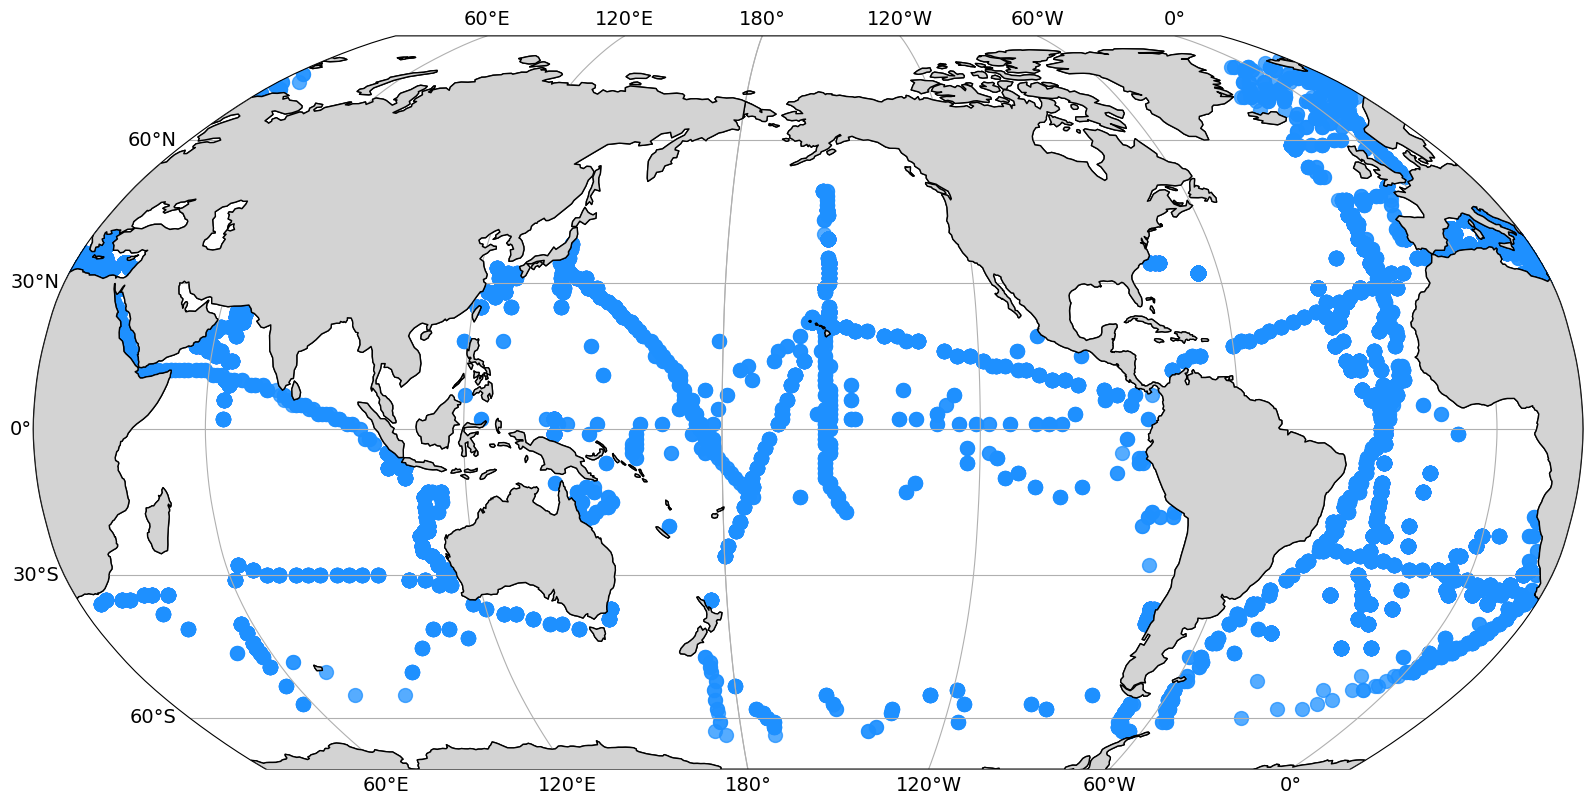

In [2]:
d = pd.read_csv("./data/Zenodo/gridded_datasets/gridded_abundances.csv")
plot_samples_latlon(d)
plt.savefig("./Figures/Figure2a.svg", format='svg', dpi=300)

/home/phyto-2/CASCADE/cascade/functions.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north['months_since_winter_solstice'] = abs(np.where(north['Month'] <= 11, north['Month'], 0))
/home/phyto-2/CASCADE/cascade/functions.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south['months_since_winter_solstice'] = abs(np.where(south['Month'] < 6, south['Month'] + 6, south['Month']-6))


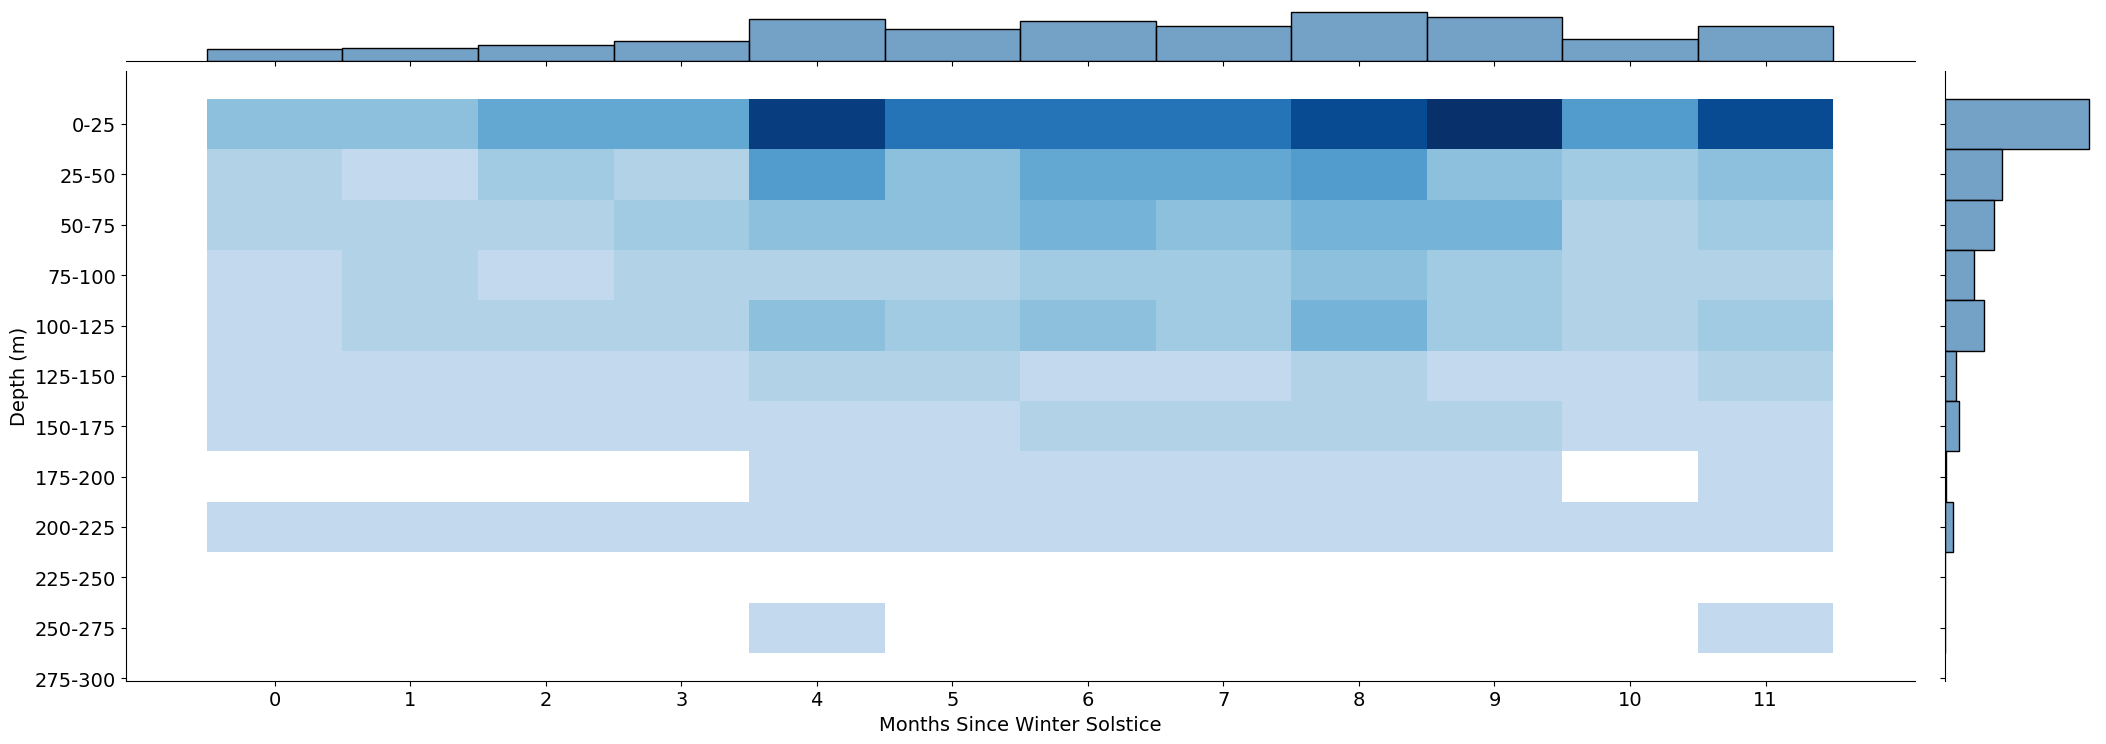

In [3]:
#plt.rcParams.update({'font.size': 30})
d = pd.read_csv("./data/Zenodo/gridded_datasets/gridded_abundances.csv")
depth_time_samples_plot(d)
plt.savefig("./Figures/Figure2b.svg", format='svg', dpi=300)

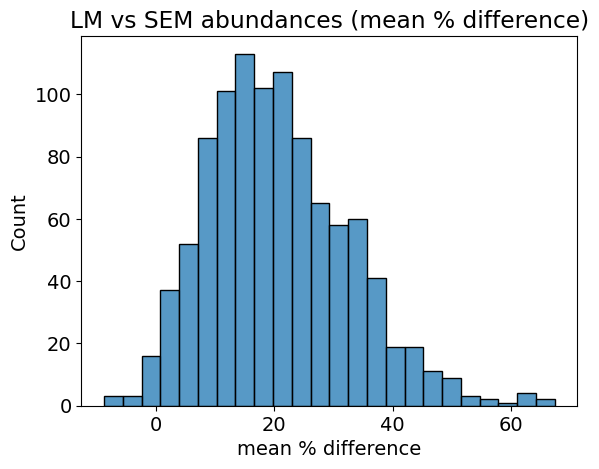

1.14
46.95
19.37
fin


In [4]:
plt.rcParams.update({'font.size': 14})

fig = LM_SEM_size_plot(d_path = "./data/Bollman2002.csv")

fig.savefig("./Figures/Figure7.svg", format='svg', dpi=300)
fig.savefig("./Figures/Figure7.png", format='png', dpi=300)

/home/phyto-2/miniconda3/envs/abil-env/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/phyto-2/CASCADE/cascade/main.py:292: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[0]


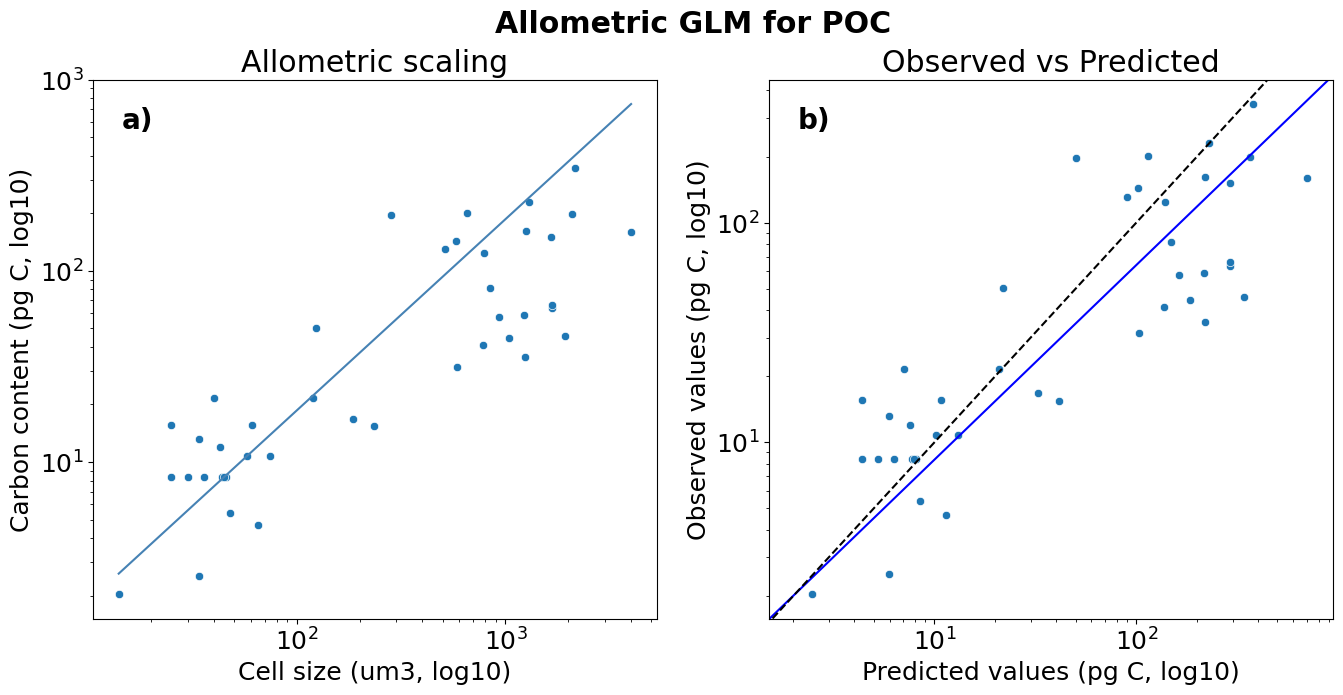

In [5]:
plt.rcParams.update({'font.size': 18})

#plot POC regression:
d = pd.read_csv("./data/allometry/poulton2024.csv")
Y_train = d['pg poc']
X_train = d['volume']

#X_train = np.log(X_train)
#X_predict = np.log(X_train)
#Y_train = np.log(Y_train)

#r = regression_simulation(X_train, Y_train)
r = regression_simulation(X_train, Y_train=Y_train, link= sm.families.links.Identity())

fig = r.plot_fit(x=X_train, y=Y_train, ylab="POC", figsize=(16, 7),
           title= "Allometric GLM for POC", log_trans=True)

fig.savefig("./Figures/Figure4.svg", format='svg', dpi=300)
fig.savefig("./Figures/Figure4.png", format='png', dpi=300)

/home/phyto-2/miniconda3/envs/abil-env/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/phyto-2/miniconda3/envs/abil-env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


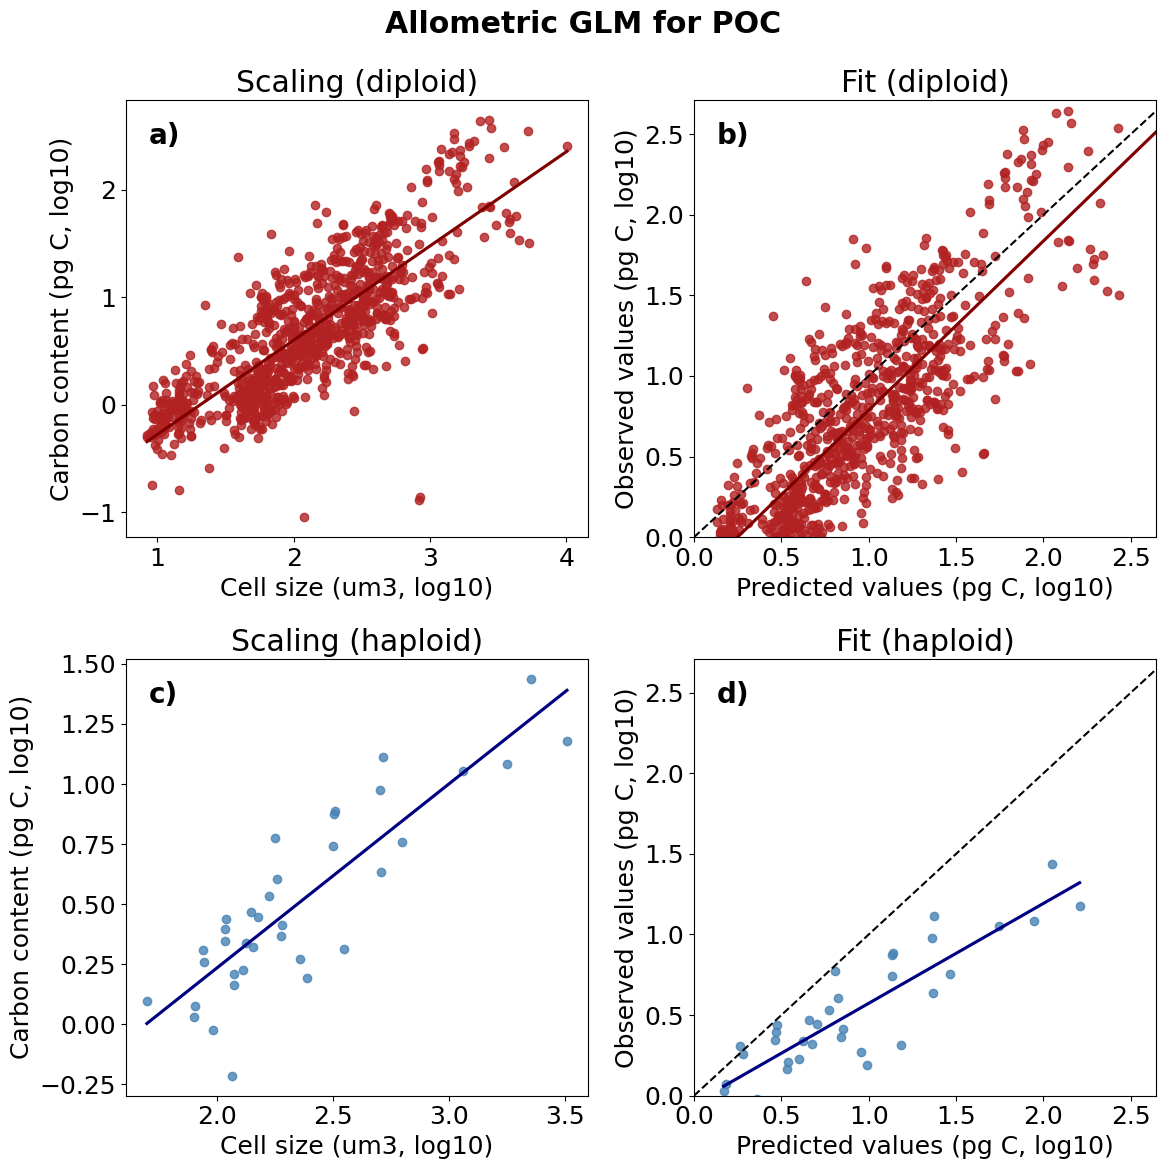

In [6]:
plt.rcParams.update({'font.size': 18})

#plot PIC regression:
d = pd.read_csv("/home/phyto-2/CASCADE/data/allometry/sheward2024.csv")
d = pd.get_dummies(d, columns=["phase"], dtype=float)
X_train = d[["volume", "phase_HET", "phase_HOL"]].astype(float)
Y_train = d['pg pic']

r = regression_simulation(X_train, Y_train=Y_train, link= sm.families.links.Identity())
fig = r.plot_fit_PIC(title= "Allometric GLM for POC", figsize=(12, 12))

fig.savefig("./Figures/Figure5.svg", format='svg', dpi=300)
fig.savefig("./Figures/Figure5.png", format='png', dpi=300)

/home/phyto-2/CASCADE/cascade/plots.py:153: RuntimeWarning: invalid value encountered in scalar divide
  return (real, minmax, ((minmax - real)*100)/real)
/home/phyto-2/CASCADE/cascade/plots.py:153: RuntimeWarning: invalid value encountered in scalar divide
  return (real, minmax, ((minmax - real)*100)/real)


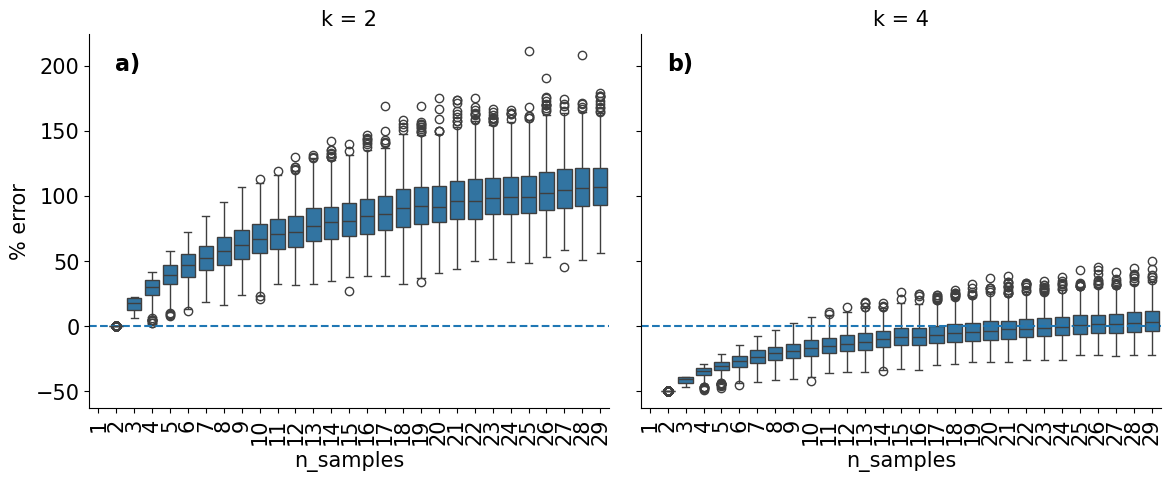

In [7]:
plt.rcParams.update({'font.size': 15})

p = sd_simulations()
fig = p.plot()
fig.savefig("./Figures/Figure6.svg", format='svg', dpi=300)
fig.savefig("./Figures/Figure6.png", format='png', dpi=300)

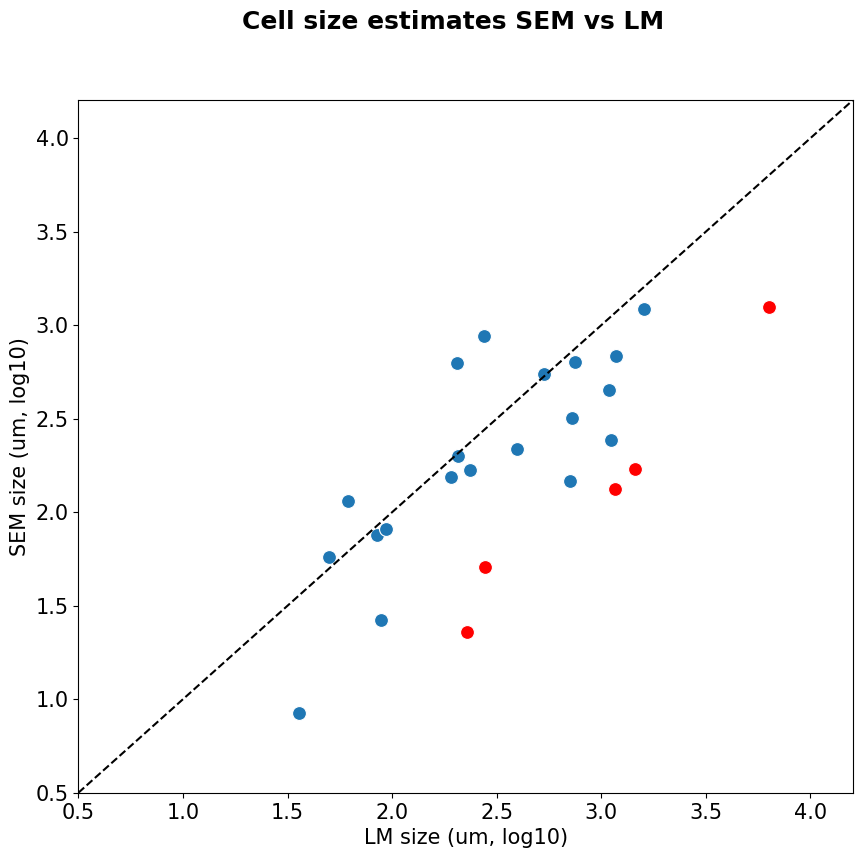

In [8]:
fig = LM_SEM_size(figsize=(10, 9))

fig.savefig("./Figures/Figure8.svg", format='svg', dpi=300)
fig.savefig("./Figures/Figure8.png", format='png', dpi=300)